In [1]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
%matplotlib inline 
#to ensure visualisations are plotted inline with the notebook

## Data gathering

In [2]:
# import the tweets archive file into a pandas dataframe

tweet_arc = pd.read_csv('twitter-archive-enhanced.csv')


In [3]:
# download the image predictions file using the requests library and load in as a pandas dataframe

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
filename = 'image-predictions.tsv'
with open(filename, 'wb') as file:
    file.write(response.content)

#loading in the downloaded file as a pandas dataframe

images_df = pd.read_csv('image-predictions.tsv', '\t')


C:\Users\Williams Praise\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# loading each tweet_ID, retweet count and favorite count into a dataframe

dict = []
with open('tweet-json.json') as file:
    for i in file:
        data = json.loads(i)
        dict.append({'tweet_id':data['id'], 'retweet_count':data['retweet_count'], 'favorite_count':data['favorite_count']})
        
tweets_df = pd.DataFrame(dict)

## Data Assessing

In [5]:
# Checking out the twitter_archived dataset

tweet_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
# checking out the image_df dataframe

images_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
# A look at the tweets_df dataframe

tweets_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [8]:
tweets_df.sample(20)

,tweet_id,retweet_count,favorite_count
961,750719632563142656,5747,14621
2262,667538891197542400,72,220
916,756651752796094464,1511,5612
940,752917284578922496,1790,7592
709,784826020293709826,3712,11310
1392,700002074055016451,1529,3627
2317,666447344410484738,23,107
1964,673343217010679808,289,1038
913,757354760399941633,1637,4995
1639,684122891630342144,539,2176


In [9]:
tweets_df[(tweets_df['retweet_count'] == 0) | (tweets_df['favorite_count'] == 0)]

,tweet_id,retweet_count,favorite_count
31,886054160059072513,108,0
35,885311592912609280,19297,0
67,879130579576475649,7181,0
72,878404777348136964,1349,0
73,878316110768087041,6965,0
...,...,...,...
1021,746521445350707200,1110,0
1041,743835915802583040,2387,0
1240,711998809858043904,138,0
2257,667550904950915073,37,0


In [10]:
# Taking a deeper look into the tweet_arc dataframe

tweet_arc.shape

(2356, 17)

In [11]:
tweet_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
tweet_arc.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
tweet_arc.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [14]:
tweet_arc.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
tweet_arc['name'].value_counts().sort_index(ascending = True)

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
               ..
such            1
the             8
this            1
unacceptable    1
very            5
Name: name, Length: 957, dtype: int64

In [16]:
images_df.shape

(2075, 12)

In [17]:
images_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1736,821813639212650496,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint_Bernard,0.995143,True,Cardigan,0.003044,True,English_springer,0.001050,True
473,675146535592706048,https://pbs.twimg.com/media/CV6aMToXIAA7kH4.jpg,1,dingo,0.288447,False,Cardigan,0.229944,True,Pembroke,0.190407,True
1449,776201521193218049,https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg,1,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True
308,671536543010570240,https://pbs.twimg.com/media/CVHG6_AWwAEJf_u.jpg,1,pug,0.537652,True,bull_mastiff,0.220617,True,French_bulldog,0.068296,True
1716,819006400881917954,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,0.007850,False
1995,874296783580663808,https://pbs.twimg.com/media/DCIgSR0XgAANEOY.jpg,1,cocker_spaniel,0.437216,True,miniature_poodle,0.277191,True,toy_poodle,0.157402,True
677,683481228088049664,https://pbs.twimg.com/media/CXw2jSpWMAAad6V.jpg,1,keeshond,0.508951,True,chow,0.442016,True,German_shepherd,0.013206,True
1492,782969140009107456,https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg,1,seat_belt,0.474292,False,golden_retriever,0.171393,True,Labrador_retriever,0.110592,True
1009,709225125749587968,https://pbs.twimg.com/media/Cdese-zWEAArIqE.jpg,1,Labrador_retriever,0.271109,True,Pomeranian,0.150487,True,golden_retriever,0.145578,True
542,677228873407442944,https://pbs.twimg.com/media/CWYAEINW4AIuw8P.jpg,1,common_iguana,0.566338,False,tennis_ball,0.154646,False,green_lizard,0.044976,False


In [18]:
# checking through the tweets_df table

tweets_df.sample(10)

,tweet_id,retweet_count,favorite_count
2309,666781792255496192,211,404
631,793962221541933056,5711,18910
363,829141528400556032,8530,26952
473,816091915477250048,2500,9927
731,781524693396357120,6426,23163
622,796031486298386433,4284,12071
1352,703631701117943808,772,2853
526,808733504066486276,2509,8784
120,869596645499047938,3327,16476
1314,706644897839910912,1224,2814


In [19]:
tweets_df.shape

(2354, 3)

### Quality Issues

- The timestamp column in the `tweet_arc` table has the wrong datatype.
- Some retweets exist in the `tweet_arc` table which need to be removed.
- Presence of extraneous columns in the `tweet_arc` table
- Unnecessary html tags in the source column of the `tweet_arc` table.
- Wrong names in the name column of the `tweet_arc` table.
- Some images in the `image_df` table are not dog images.
- Inconsistent case for breed names in the `image_df` table.
- Missing tweet ids in the `image_df` table and the `tweets_df` table.
- Tweet_ids with a favorite count of 0 in the `tweets_df` table.

### Tidiness Issues

- Floofer, puppo, doggo and pupper in the `tweet_arc` table are represented each as a column
- A column for dog breeds can be added to the image_df` table.
- The tables should combined together once cleaning is done.

### Data Cleaning

### Quality

In [20]:
# create a copy of the tweet_arc table to carry out the cleaning tasks

tweet_arc_clean = tweet_arc.copy()

In [21]:
tweet_arc_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
276,840632337062862849,NaN,NaN,2017-03-11 18:35:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Maddie and Gunner. They are consi...,NaN,NaN,NaN,"https://www.gofundme.com/3hgsuu0,https://twitt...",12,10,Maddie,None,None,None,None
2135,670061506722140161,NaN,NaN,2015-11-27 02:08:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Liam. He has a particular set of skill...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670061506...,11,10,Liam,None,None,None,None
2244,667886921285246976,NaN,NaN,2015-11-21 02:07:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Erik. He's fucken massive. But also ki...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667886921...,11,10,Erik,None,None,None,None
1382,700864154249383937,NaN,NaN,2016-02-20 02:06:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Pupper is a present to world. Here is a bow f...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/700864154...,12,10,a,None,None,pupper,None
2079,670826280409919488,NaN,NaN,2015-11-29 04:47:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Scary dog here. Too many legs. Extra tail. Not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670826280...,2,10,None,None,None,None,None


**The timestamp column in the `tweet_arc` table has the wrong datatype.**

**Define**

Convert the timestamp column in the `tweet_arc` table to datetime datatype.

**Code**

In [22]:
tweet_arc_clean['timestamp'] = pd.to_datetime(tweet_arc_clean['timestamp'])

**Test**

In [23]:
tweet_arc_clean.timestamp.dtype

datetime64[ns, UTC]

**Some retweets exist in the `tweet_arc` table which need to be removed.**

**Define**

Drop rows with non-null value of the retweeted_status_id column in the `tweet_arc` table.

**Code**

In [24]:
retweets = tweet_arc_clean[tweet_arc_clean.retweeted_status_id.notna()] # segmenting the table for retweets

tweet_arc_clean = tweet_arc_clean.drop(retweets.index)

**Test**

In [25]:
tweet_arc_clean[tweet_arc_clean['retweeted_status_id'].notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**Presence of extraneous columns in the `tweet_arc` table**

**Define**

Drop columns with no relevance to the analysis in the `tweet_arc` table

**Code**

In [26]:
tweet_arc_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls',
                   'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

**Test**

In [27]:
tweet_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 203.9+ KB


**Unnecessary html tags in the source column of the `tweet_arc` table.**

**Define**

Replace the html tags with the tweet source label

**Code**

In [28]:
old_label = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']

new_label = ['Twitter for Iphone', 'Twitter Web Client',
             'Vine', 'TweetDeck']

tweet_arc_clean.source.replace(old_label, new_label, inplace=True)

**Test**

In [29]:
tweet_arc_clean['source'].sample(5, replace=True)

886                   Vine
719     Twitter for Iphone
1609    Twitter for Iphone
1031    Twitter for Iphone
179     Twitter for Iphone
Name: source, dtype: object

**Erroneous names in the name column of the `tweet_arc` table.**

**Define**

Replace the erroneous names and names labelled as None with No-name to indicate that such dogs have no name.

**Code**

In [30]:
wrong_name = [i for i in tweet_arc_clean.name if i.islower()]

tweet_arc_clean['name'] = tweet_arc_clean['name'].replace(wrong_name + ['None'], 'No-name')

**Test**

In [31]:
tweet_arc_clean['name'].value_counts()

No-name       784
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 931, dtype: int64

**Some images in the `image_df` table are not dog images.**

**Define**

Filter out the images that are not dog images in the image prediction table.

**Code**

In [32]:
# create a copy of the image dataframe upon which the cleaning is done.
images_copy = images_df.copy()

# segmenting the images_copy dataframe to reveal images that are not dogs
not_dog_images = images_copy[(images_copy['p1_dog'] == False) & (images_copy['p2_dog'] == False) & (images_copy['p3_dog'] == False)]
not_dog_images

# filtering them out
images_copy.drop(not_dog_images.index, inplace=True)

**Test**

In [33]:
images_copy.query('p1_dog == False & p2_dog == False & p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**Inconsistent case for breed names in the `image_df` table.**

**Define**

Update all breed names to title case for consistency



**Code**

In [34]:
images_copy['p1'] = images_copy['p1'].str.title()

images_copy['p2'] = images_copy['p2'].str.title()

images_copy['p3'] = images_copy['p3'].str.title()

**Test**

In [35]:
images_copy[['p1', 'p2', 'p3']].sample(10)

,p1,p2,p3
418,Toy_Poodle,Miniature_Poodle,Maltese_Dog
1739,Pomeranian,Samoyed,Maltese_Dog
359,Golden_Retriever,Labrador_Retriever,Clumber
1627,Chow,Binoculars,Irish_Setter
31,Blenheim_Spaniel,Cocker_Spaniel,Shih-Tzu
1276,Redbone,Malinois,Miniature_Pinscher
1144,Pug,Norwegian_Elkhound,German_Shepherd
562,Eskimo_Dog,Dalmatian,American_Staffordshire_Terrier
1154,Koala,Staffordshire_Bullterrier,Mongoose
1955,Bull_Mastiff,French_Bulldog,Staffordshire_Bullterrier


**Tweet_ids with a favorite count of 0 in the `tweets_df` table.**

**Define**

Drop all tweet_ids with a favorite count of 0 in the `tweets_df` table.

**Code**

In [36]:
# creating a copy of the tweet_df table on which the cleaning is carried out

tweets_df_clean = tweets_df.copy()

tweets_df_clean = tweets_df_clean.query('favorite_count != 0')

**Test**

In [37]:
tweets_df_clean.query('favorite_count == 0')

,tweet_id,retweet_count,favorite_count


### Tidiness

**Floofer, puppo, doggo and pupper in the `tweet_arc` table are represented each as a column**

**Define**

The floofer, puppo, doggo and pupper columns in the `tweet_arc` need to be consolidated into one column since they all represent one feature - dog stage.

**Code**

In [38]:
stages_df = pd.melt(tweet_arc_clean, id_vars='tweet_id',value_vars=['doggo', 'floofer', 'pupper', 'puppo'], value_name='dog_stage')
stages_df

,tweet_id,variable,dog_stage
0,892420643555336193,doggo,None
1,892177421306343426,doggo,None
2,891815181378084864,doggo,None
3,891689557279858688,doggo,None
4,891327558926688256,doggo,None
...,...,...,...
8695,666049248165822465,puppo,None
8696,666044226329800704,puppo,None
8697,666033412701032449,puppo,None
8698,666029285002620928,puppo,None


In [39]:
# drop the variable column

stages_df.drop('variable', axis = 1, inplace=True)

# duplicates in the stages dataframe need to be dropped

stages_df.drop_duplicates(inplace=True)

In [40]:
# The None values are replaced with np.NaN for pandas to detect them as empty rows

stages_df.replace('None', np.NaN, inplace=True)
stages_df


,tweet_id,dog_stage
0,892420643555336193,NaN
1,892177421306343426,NaN
2,891815181378084864,NaN
3,891689557279858688,NaN
4,891327558926688256,NaN
...,...,...
7298,752519690950500352,puppo
7311,751132876104687617,puppo
7383,744995568523612160,puppo
7395,743253157753532416,puppo


In [41]:
stages_df.isna().sum()

tweet_id        0
dog_stage    2175
dtype: int64

In [42]:
stages_df.shape

(2531, 2)

In [43]:
tweet_arc_clean.shape

(2175, 11)

In [44]:
# segment the stages_df table to reveal the tweets with dog stages

dog_stages = stages_df[stages_df['dog_stage'].notna()]

In [45]:
has_more_stages = dog_stages[dog_stages.duplicated(subset='tweet_id', keep=False)].sort_values('tweet_id')

has_more_stages

,tweet_id,dog_stage
935,733109485275860992,doggo
5285,733109485275860992,pupper
885,741067306818797568,doggo
5235,741067306818797568,pupper
781,751583847268179968,doggo
5131,751583847268179968,pupper
722,759793422261743616,doggo
5072,759793422261743616,pupper
593,781308096455073793,doggo
4943,781308096455073793,pupper


In [46]:
# the tweets with more than one dog stage are joined with a comma

combined_dog_stage = has_more_stages.groupby('tweet_id').transform(lambda x: ', '.join(x))
combined_dog_stage.head()

,dog_stage
935,"doggo, pupper"
5285,"doggo, pupper"
885,"doggo, pupper"
5235,"doggo, pupper"
781,"doggo, pupper"


In [47]:
# the combined dog stage is replaced in the stages_df table

stages_df.loc[combined_dog_stage.index, 'dog_stage'] = combined_dog_stage.values

In [48]:
stages_df['dog_stage'].unique()

array([nan, 'doggo', 'doggo, puppo', 'doggo, floofer', 'pupper, doggo',
       'doggo, pupper', 'floofer', 'pupper', 'puppo'], dtype=object)

In [49]:
# the dog_stage values are sorted to push the null values to the bottom

stages_df.sort_values('dog_stage', inplace=True)

# Now all duplicates are removed

stages_df.drop_duplicates('tweet_id', inplace=True)

**Test**

In [50]:
stages_df.head(10)

,tweet_id,dog_stage
9,890240255349198849,doggo
730,758828659922702336,doggo
715,760521673607086080,doggo
711,760893934457552897,doggo
694,763956972077010945,doggo
678,767191397493538821,doggo
674,768193404517830656,doggo
653,771908950375665664,doggo
743,757393109802180609,doggo
631,775364825476165632,doggo


In [51]:
# The stages_df table can now be combined with the cleaned tweet_arc table and the individual dog stage in the 
# tweet_arc table can be dropped

tweet_arc_clean = pd.merge(tweet_arc_clean, stages_df, how = 'left', on = 'tweet_id')

tweet_arc_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [52]:
tweet_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   dog_stage           344 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 152.9+ KB


**A column for dog breed can be added to the image_df table**

**Define**

A column for dog breeds based on the image predictions is added to the table and other irrelevant columns are dropped



**Code**

In [53]:
# utilizing list comprehension to determine dog breed from the image predictions

dog_breed = [images_copy.p1[i] if images_copy.p1_dog[i] == True else images_copy.p2[i] if images_copy.p2_dog[i] == True 
             else images_copy.p3[i] for i in list(images_copy.index)]

# adding a dog_breed column to the images_copy table
images_copy['dog_breed'] = dog_breed

# dropping irrelevant columns
images_copy.drop(['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
                  'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)

**Test**

In [54]:
images_copy.head()

,tweet_id,dog_breed
0,666020888022790149,Welsh_Springer_Spaniel
1,666029285002620928,Redbone
2,666033412701032449,German_Shepherd
3,666044226329800704,Rhodesian_Ridgeback
4,666049248165822465,Miniature_Pinscher


**The tables should be combined together once cleaning is done**

**Define**

The cleaned `tweet_arc` table is combined with the `images_copy` table selecting only tweets with images.

**Code**


In [55]:
# extracting the tweets with images in the image_copy table

tweet_arc_clean= tweet_arc_clean[tweet_arc_clean['tweet_id'].isin(images_copy.tweet_id)]

# combining the tweet_arc_clean table with the images_copy table

combined_table = pd.merge(tweet_arc_clean, images_copy, on = 'tweet_id')

# merging all cleaned tables together

master_df = pd.merge(combined_table, tweets_df_clean, on = 'tweet_id')

**Test**

In [56]:
master_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1686 non-null   int64              
 1   timestamp           1686 non-null   datetime64[ns, UTC]
 2   source              1686 non-null   object             
 3   text                1686 non-null   object             
 4   rating_numerator    1686 non-null   int64              
 5   rating_denominator  1686 non-null   int64              
 6   name                1686 non-null   object             
 7   dog_stage           260 non-null    object             
 8   dog_breed           1686 non-null   object             
 9   retweet_count       1686 non-null   int64              
 10  favorite_count      1686 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 158.1+ KB


## Storing the cleaned dataset

In [57]:
# storing the cleaned dataset in a csv file. 
master_df.to_csv('twitter_archive_master.csv',index=False)

## Analysis and Visualisation

In [58]:
tweets_archive_master_df = pd.read_csv('twitter_archive_master.csv')

tweets_archive_master_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,dog_breed,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for Iphone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,Chihuahua,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for Iphone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,Chihuahua,4328,25461
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for Iphone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,Labrador_Retriever,8964,42908
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for Iphone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,Basset,9774,41048
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for Iphone,Here we have a majestic great white breaching ...,13,10,No-name,NaN,Chesapeake_Bay_Retriever,3261,20562


## Analysis on Breeds

In [59]:
breed_counts = tweets_archive_master_df.groupby(['dog_breed']).count()
breed_sums = tweets_archive_master_df.groupby(['dog_breed']).sum()
breed_stats = tweets_archive_master_df.groupby(['dog_breed']).mean().round()[['retweet_count', 'favorite_count']]
breed_stats['tweet_counts'] = breed_counts['tweet_id']
breed_stats['total_favorite_count'] = breed_sums['favorite_count']
breed_stats['total_retweet_count'] = breed_sums['retweet_count']
breed_stats = breed_stats.reset_index()
breed_stats.rename({'retweet_count':'mean_retweet_count', 'favorite_count':'mean_favorite_count'}, axis = 1, inplace=True)
breed_stats = breed_stats.astype({'mean_retweet_count':'int64', 'mean_favorite_count':'int64',
                                    'total_favorite_count':'int64', 'total_retweet_count':'int64'})
breed_stats = breed_stats[['dog_breed', 'tweet_counts', 'total_retweet_count', 'total_favorite_count', 
                           'mean_retweet_count', 'mean_favorite_count']]
breed_stats.head(10)

,dog_breed,tweet_counts,total_retweet_count,total_favorite_count,mean_retweet_count,mean_favorite_count
0,Afghan_Hound,3,17928,51980,5976,17327
1,Airedale,12,16725,63370,1394,5281
2,American_Staffordshire_Terrier,16,36973,150083,2311,9380
3,Appenzeller,2,2916,14635,1458,7318
4,Australian_Terrier,2,6157,22255,3078,11128
5,Basenji,9,8011,22534,890,2504
6,Basset,17,49563,199955,2915,11762
7,Beagle,20,27050,88159,1352,4408
8,Bedlington_Terrier,6,45061,126919,7510,21153
9,Bernese_Mountain_Dog,11,17782,80124,1617,7284


**Most popular dog breed by number of tweets**

,dog_breed,tweet_counts
45,Golden_Retriever,158
62,Labrador_Retriever,108
80,Pembroke,95
27,Chihuahua,91
82,Pug,62
103,Toy_Poodle,51
28,Chow,48
81,Pomeranian,42
88,Samoyed,42
66,Malamute,33


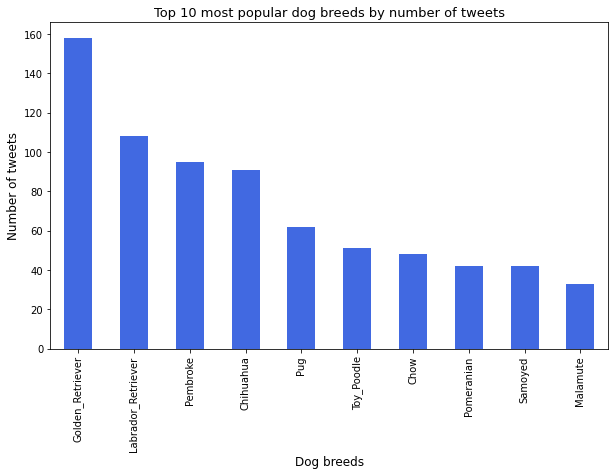

In [60]:
popular10_breed = breed_stats.sort_values(by = 'tweet_counts', ascending=False).head(10)

# creating a function for plotting figures

def plot_figure(df, x, y, plot_type, xlabel, ylabel, title, figsize, legend, color):
    df.plot(x = x, y = y, kind = plot_type, figsize = figsize, legend = legend, color = color)
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel(ylabel, fontsize = 12)
    plt.title(title, fontsize = 13)
    
# calling the plot_figure function to plot a bar chart of the 10 most popular breeds

plot_figure(df = popular10_breed,x = 'dog_breed', y = 'tweet_counts',
           plot_type='bar', xlabel='Dog breeds',
            ylabel= 'Number of tweets',
           title='Top 10 most popular dog breeds by number of tweets', figsize = (10,6),
           legend = None, color = 'royalblue')

popular10_breed[['dog_breed', 'tweet_counts']]

**Which dog breed had the highest retweet count per tweet**

,dog_breed,mean_retweet_count
8,Bedlington_Terrier,7510
0,Afghan_Hound,5976
98,Standard_Poodle,5509
37,English_Springer,5402
87,Saluki,5134
41,French_Bulldog,5040
30,Cocker_Spaniel,4858
88,Samoyed,4844
110,Whippet,4840
48,Great_Pyrenees,4534


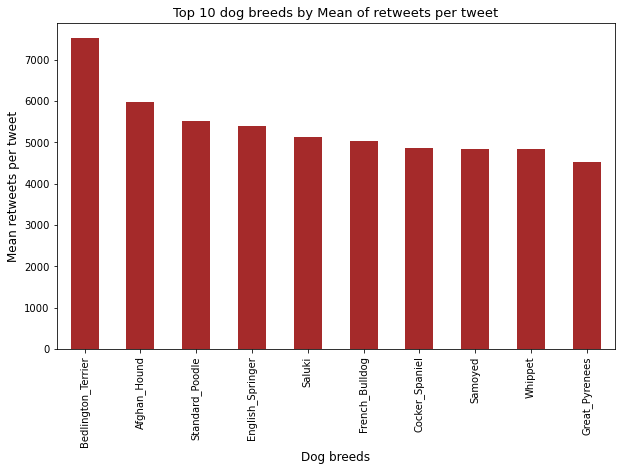

In [61]:
top_retweets_per_tweet = breed_stats.sort_values(by = 'mean_retweet_count', ascending=False).head(10)

plot_figure(df = top_retweets_per_tweet, x = 'dog_breed', y = 'mean_retweet_count', 
            plot_type='bar',legend=None, xlabel='Dog breeds',title= 'Top 10 dog breeds by Mean of retweets per tweet',
            ylabel = 'Mean retweets per tweet',
           figsize=(10,6), color = 'brown')

top_retweets_per_tweet[['dog_breed', 'mean_retweet_count']]

**Which dog had the highest likes per tweet?**

,dog_breed,mean_favorite_count
87,Saluki,24060
8,Bedlington_Terrier,21153
41,French_Bulldog,18417
18,Bouvier_Des_Flandres,18032
0,Afghan_Hound,17327
10,Black-And-Tan_Coonhound,17012
40,Flat-Coated_Retriever,16792
54,Irish_Water_Spaniel,16400
64,Leonberg,14934
37,English_Springer,14138


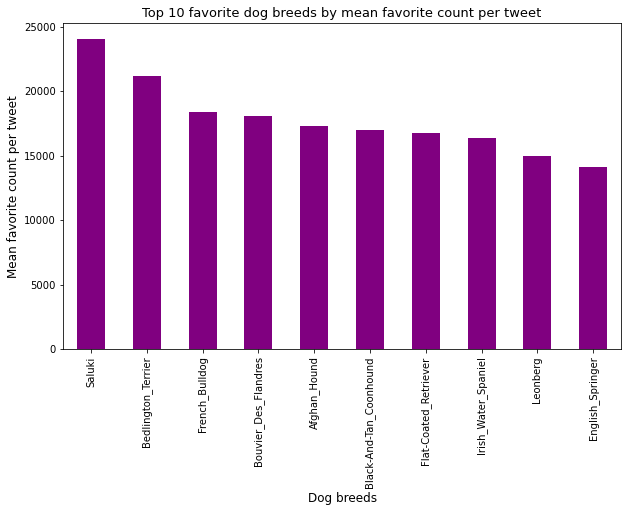

In [62]:
top_likes_per_tweet = breed_stats.sort_values(by = 'mean_favorite_count', ascending=False).head(10)
plot_figure(df = top_likes_per_tweet, x = 'dog_breed', y = 'mean_favorite_count', plot_type='bar',
           xlabel='Dog breeds', ylabel='Mean favorite count per tweet',
           title='Top 10 favorite dog breeds by mean favorite count per tweet',
           figsize=(10,6), color='purple', legend = None)

top_likes_per_tweet[['dog_breed', 'mean_favorite_count']]

**Which dog stage was most common?**

,dog_stage,tweet_id
0,"doggo, floofer",1
1,"doggo, puppo",1
2,"pupper, doggo",1
3,"doggo, pupper",7
4,floofer,7
5,puppo,21
6,doggo,54
7,pupper,168


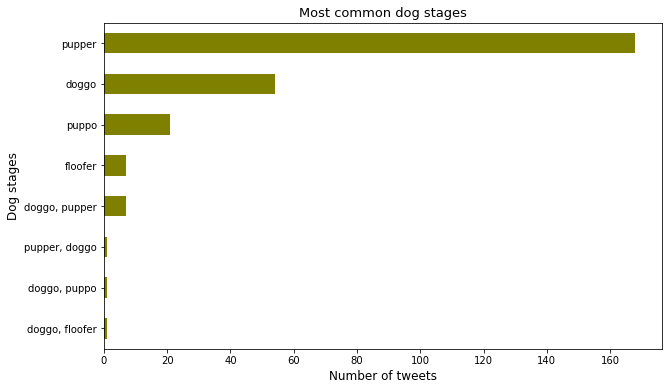

In [63]:
stage_df = tweets_archive_master_df[tweets_archive_master_df.dog_stage.notna()]
dog_stage_grouped = stage_df.groupby('dog_stage').count().sort_values(by = 'tweet_id')
dog_stage_grouped = dog_stage_grouped.reset_index()

plot_figure(df = dog_stage_grouped, x = 'dog_stage', y= 'tweet_id', xlabel='Number of tweets',
           ylabel='Dog stages', plot_type = 'barh', title='Most common dog stages',
           legend=None, figsize = (10,6), color='olive')

dog_stage_grouped[['dog_stage', 'tweet_id']]

### Insights

* The most popular dog breed was the **Golden retriever** with a total of 158 tweets.
* The most retweeted breed was the **Bedlington_Terrier** with a mean of 7510 retweets.
* The most favorited breed was the **Saluki** breed with a mean of 24060 favorite counts.
* The most common dog stage was the **Pupper** stage with a total of 168 tweets.